In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tickers = ['AAPL', 'WMT', 'JPM', 'TSLA']
start_date = '2023-01-01'
end_date = '2025-11-13'
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)


prices = data['Close'].copy()
prices = prices.dropna()
returns = prices.pct_change()
returns = returns.dropna()


tradingDays = 252
meanDailyReturns = returns.mean()
annualReturns = meanDailyReturns * tradingDays
covariance = returns.cov() * tradingDays
numOfStocks = len(tickers)
print("--- Annualized Returns ---")
print(annualReturns)
print("\n--- Annualized Covariance Matrix ---")
print(covariance)


numOfPortfolios = 25000
allWeights = np.zeros((numOfPortfolios, numOfStocks)) #2d list
allReturns = np.zeros(numOfPortfolios) #1d empty list to input returns
allVolatility = np.zeros(numOfPortfolios) #1d empty list to input volatility
allSharpeRatio = np.zeros(numOfPortfolios) #1d empty list to input sharpe ratio
for i in range(numOfPortfolios): #loops certain amount of times
  weights = np.random.random(numOfStocks) #generates # of stocks random numbers
  weights = weights / np.sum(weights) #finds percentage of number out of 1
  allWeights[i, :] = weights #plug weights into row of i
  portfolioReturn = np.dot(weights, annualReturns) #use dot product to find return
  allReturns[i] = portfolioReturn #input this specific combo into 1d list
  portfolioVolatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
  allVolatility[i] = portfolioVolatility #repeats

  if allVolatility[i] != 0: #in case volatility is 0
    allSharpeRatio[i] = portfolioReturn / allVolatility[i] #return/risk
  else:
    allSharpeRatio[i] = 0

print("--- Simulation Complete ---")
print(f"We just simulated {numOfPortfolios} random portfolios.")

[*********************100%***********************]  4 of 4 completed


--- Annualized Returns ---
Ticker
AAPL    0.313521
JPM     0.355498
TSLA    0.667803
WMT     0.301842
dtype: float64

--- Annualized Covariance Matrix ---
Ticker      AAPL       JPM      TSLA       WMT
Ticker                                        
AAPL    0.067722  0.018683  0.070399  0.014635
JPM     0.018683  0.052754  0.049375  0.011538
TSLA    0.070399  0.049375  0.369428  0.026197
WMT     0.014635  0.011538  0.026197  0.038365
--- Simulation Complete ---
We just simulated 25000 random portfolios.


In [ ]:
maxSharpeIndex = np.argmax(allSharpeRatio) #find index of highest sharpe ratio
optimalReturn = allReturns[maxSharpeIndex]
optimalVolatility = allVolatility[maxSharpeIndex]
optimalWeights = allWeights[maxSharpeIndex]
print("--- Optimal Portfolio (Highest Sharpe Ratio) ---")
print(f"Annual Return: {optimalReturn*100:.2f}%")
print(f"Annual Volatility (Risk): {optimalVolatility*100:.2f}%")
print(f"Sharpe Ratio: {allSharpeRatio[maxSharpeIndex]:.2f}")
print("\nOptimal Weights (The 'Pie Chart'):")
for i in range(len(tickers)):
  print(f"{tickers[i]}: {optimalWeights[i]*100:.2f}%")

--- Optimal Portfolio (Highest Sharpe Ratio) ---
Annual Return: 33.82%
Annual Volatility (Risk): 16.66%
Sharpe Ratio: 2.03

Optimal Weights (The 'Pie Chart'):
AAPL: 12.67%
WMT: 37.94%
JPM: 3.96%
TSLA: 45.44%


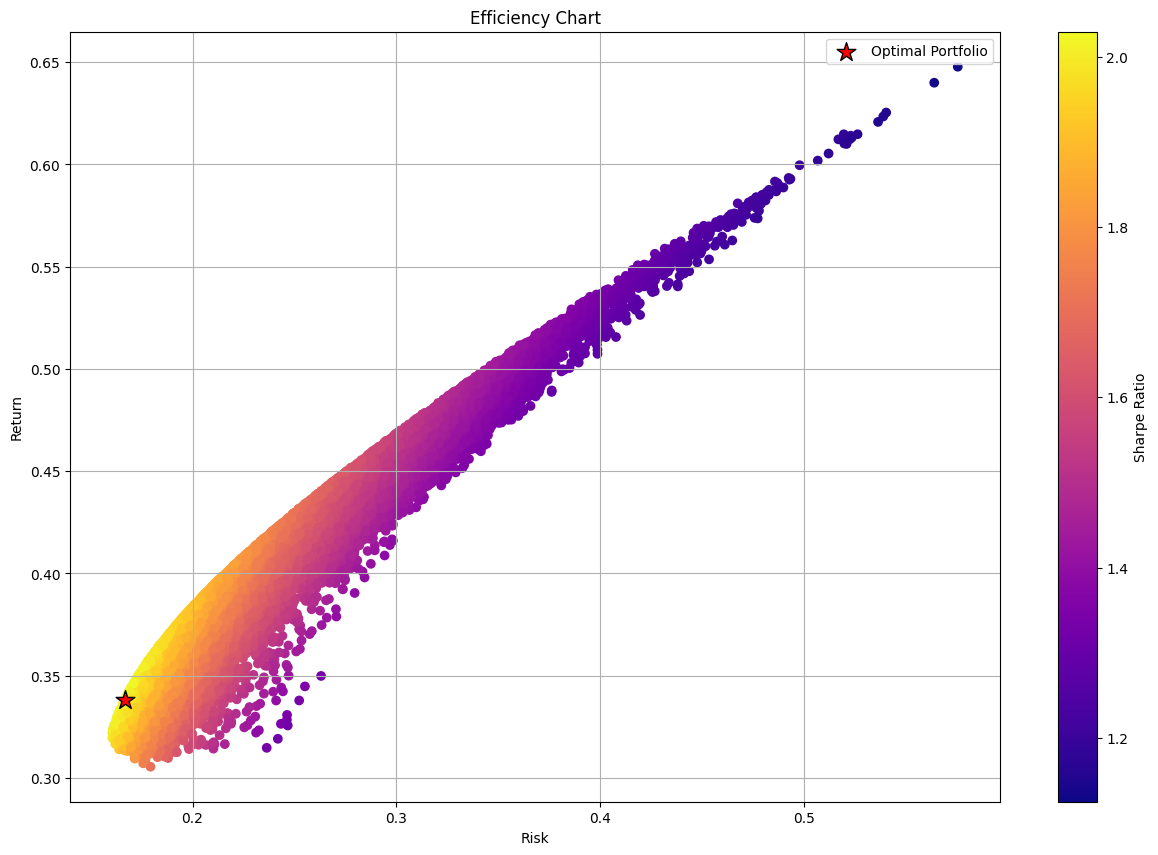

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(allVolatility, allReturns, c=allSharpeRatio, cmap='plasma')
plt.title('Efficiency Chart')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimalVolatility, optimalReturn, c='red', s=200,
            edgecolors='black', marker='*',
            label='Optimal Portfolio')
plt.legend()
plt.grid(True)
plt.show()